In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\User\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Number of classes: {y_train.shape[1]}")

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Number of classes: 10


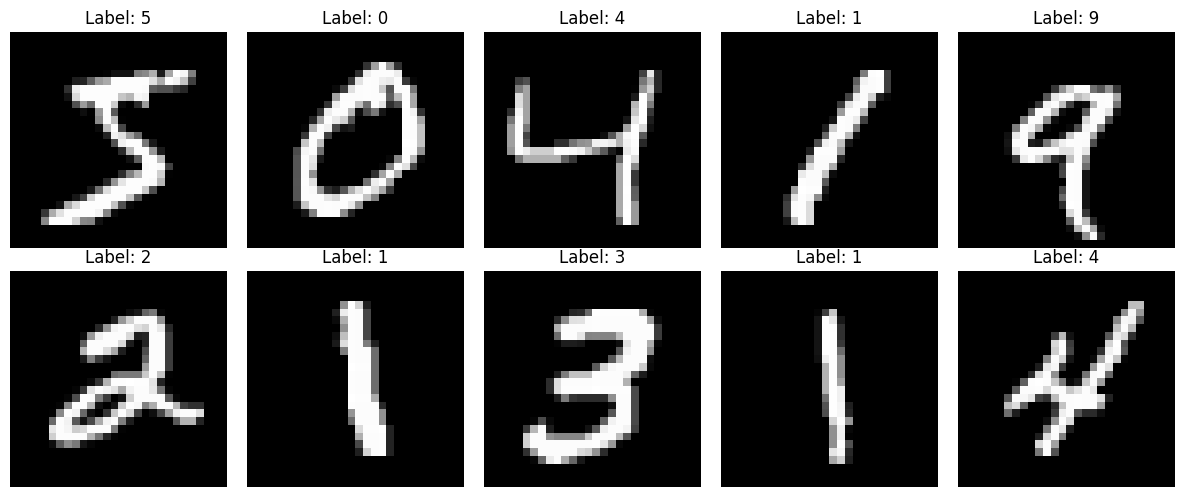

In [ ]:

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def numberdetect():
    model = keras.Sequential([
     
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.25),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    return model

model = numberdetect()
model.summary()

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8930 - loss: 0.3510 - val_accuracy: 0.9775 - val_loss: 0.0747
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9666 - loss: 0.1132 - val_accuracy: 0.9872 - val_loss: 0.0463
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9760 - loss: 0.0819 - val_accuracy: 0.9887 - val_loss: 0.0378
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9806 - loss: 0.0667 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9820 - loss: 0.0601 - val_accuracy: 0.9895 - val_loss: 0.0358
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9838 - loss: 0.0533 - val_accuracy: 0.9910 - val_loss: 0.0309
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9854 - loss: 0.0489 - val_accuracy: 0.9905 - val_loss: 0.0317
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accu

In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Loss: 0.0265
Test Accuracy: 99.14%


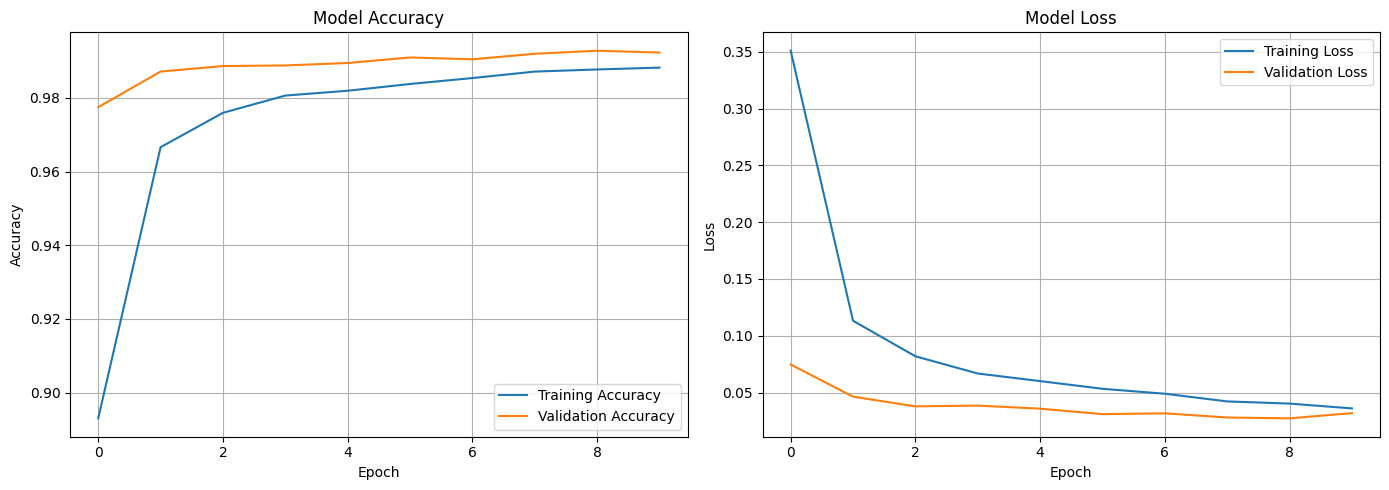

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


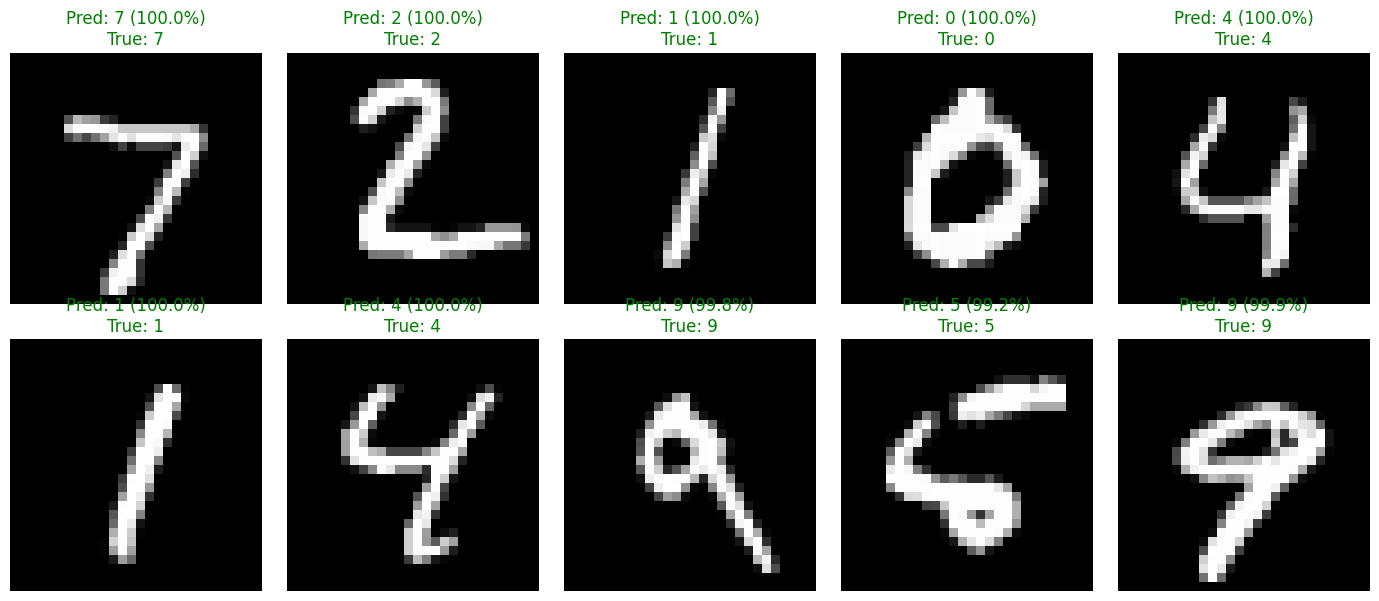

In [ ]:

predictions = model.predict(x_test[:10])
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    confidence = predictions[i][pred_label] * 100
    
    color = 'green' if pred_label == true_label else 'red'
    ax.set_title(f"Pred: {pred_label} ({confidence:.1f}%)\nTrue: {true_label}", color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

model.save('digit_recognition_cnn.h5')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28, 28))
    inverted = cv2.bitwise_not(resized) 
    normalized = inverted.astype('float32') / 255.0
    reshaped = normalized.reshape(1, 28, 28, 1)
    return reshaped

In [ ]:
def recognize_digit_webcam():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not access webcam")
        return
    
    print(" Press 'q' to quit")
    print("Show a digit")
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        height, width = frame.shape[:2]
        
        roi_size = min(height, width) // 2
        x1 = (width - roi_size) // 2
        y1 = (height - roi_size) // 2
        x2 = x1 + roi_size
        y2 = y1 + roi_size
        
        roi = frame[y1:y2, x1:x2]
        processed = preprocess_frame(roi)
        prediction = model.predict(processed, verbose=0)
        digit = np.argmax(prediction)
        confidence = prediction[0][digit] * 100

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        text = f"Digit: {digit} ({confidence:.1f}%)"
        cv2.putText(frame, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                   1.2, (0, 255, 0), 2, cv2.LINE_AA)
        
        cv2.putText(frame, "Press 'q' to quit", (10, height - 20), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.imshow('Digit Recognition', frame)
        display_roi = cv2.resize(processed.reshape(28, 28), (200, 200))
        cv2.imshow('Preprocessed Input', display_roi)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    print("Webcam stopped")
recognize_digit_webcam()